In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

In [2]:
df = pd.read_csv('~echabanova/Documents/lidl_case_study/scientificProject/data/candy-data.csv')

In [67]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent_unit
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.669717
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0.676029
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.322611
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.461165
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0.523415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0.454663
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0.390119
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0.443755
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0.419043


In [66]:
df.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
winpercent_unit     float64
dtype: object

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


- Except for winpercent, pricepercent and sugarpercent, all other columns are binary.
- DV is winpercent which ranges between 0 and 100%, i.e., between 0 and 1 - it may have implications for model selection. 

In [5]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [6]:
for col in ['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
            'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']:
    print(col)
    print(df[col].unique())

chocolate
[1 0]
fruity
[0 1]
caramel
[1 0]
peanutyalmondy
[0 1]
nougat
[0 1]
crispedricewafer
[1 0]
hard
[0 1]
bar
[1 0]
pluribus
[0 1]


- All binary columns have indeed only two unique values.

In [7]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


- Strong positive correlation between winpercent and chocolate (0.637) and winpercent, bar (0.430), peanutyalmondy (0.406), pricepercent (0.345).
- It suggets that properties like chocolate, penuatyalmody, bar are important candy features for winpercent.
- Positive correlation between price ranking and winpercent (0.345) suggests that pricier candies are more popular. 

<Axes: >

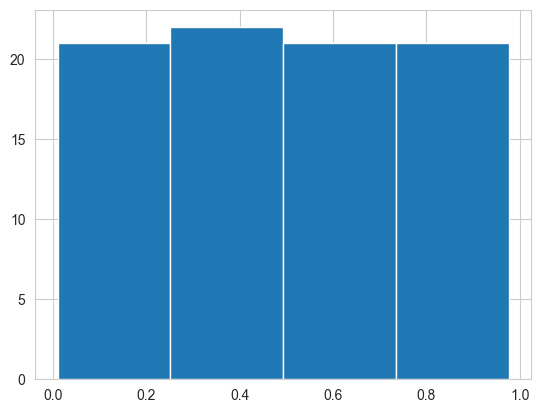

In [9]:
df["pricepercent"].hist(bins=4)

- Pricepercent may help to rank candies into 4 price categories.
- It is unclear, for which price category Lidl plans to produce a candy. Is it relevant here?

## Thoughts
- Winpercent varies between 0 and 1 - it may have implications for model selection.
- The vast majority of features are binary.
- The dataset is very small, so we may need to be careful with the number of features we include in the model.
- How many candy features are enough? E.g., chocolate vs chocolate-peanutyalmondy vs chocolate-peanutyalmondy-bar vs chocolate-peanutyalmondy-bar-fruity? 
- What combinations of features are the most popular?
- 6 features are about the taste, 3 are about the texture, 1 is about the sugar content, 1 is about price.
- Can pricepercent be interpreted as "quality" feature?
- Fruity vs. chocolate - fruity in terms of flavor is often a "standalone" thing. Chocolate is often combined with other flavors.
- Caramel, nougat are mostly not standalone flavors.

In [18]:
X = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
        'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent']]
y = df["winpercent"]
reg = LinearRegression().fit(X, y)

In [19]:
reg.coef_

array([19.21568138,  9.58672878,  1.9820335 ,  9.45442976,  1.9179501 ,
        8.63672609, -5.86574674, -1.233272  , -1.14670499,  7.49048634])

In [29]:
X = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
        'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']]
y = df["winpercent"]
X = sm.add_constant(X)
mod = OLS(y, X)
res = mod.fit()

In [30]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           9.50e-09
Time:                        16:58:00   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.5340      4.320  

In [31]:
from statsmodels.formula.api import ols

In [65]:
model = ols(
    'winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus + sugarpercent + chocolate*peanutyalmondy',
    data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     8.205
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           3.79e-09
Time:                        17:29:06   Log-Likelihood:                -314.45
No. Observations:                  85   AIC:                             652.9
Df Residuals:                      73   BIC:                             682.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [46]:
from statsmodels.formula.api import logit

In [48]:
df["winpercent_unit"] = df["winpercent"] / 100

In [56]:
model = logit(
    'winpercent_unit ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus',
    data=df).fit()

Optimization terminated successfully.
         Current function value: 0.650350
         Iterations 4


In [57]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:        winpercent_unit   No. Observations:                   85
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            9
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                 0.06143
Time:                        17:13:07   Log-Likelihood:                -55.280
converged:                       True   LL-Null:                       -58.898
Covariance Type:            nonrobust   LLR p-value:                    0.6126
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6243      0.781     -0.799      0.424      -2.155       0.906
chocolate            0.8155      0.739      1.104      0.270      -0.632       2.263
fruity               0.4347 

In [58]:
mfx = model.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:        winpercent_unit
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
chocolate            0.1949      0.171      1.137      0.256      -0.141       0.531
fruity               0.1039      0.172      0.605      0.545      -0.233       0.441
caramel              0.0355      0.164      0.217      0.828      -0.286       0.357
peanutyalmondy       0.1038      0.164      0.633      0.526      -0.217       0.425
nougat               0.0238      0.257      0.093      0.926      -0.480       0.528
crispedricewafer     0.0921      0.244      0.378      0.705      -0.385       0.570
hard                -0.0482      0.155     -0.311      0.755      -0.351       0.255
bar                 -0.0067      0.220     -0.030      0.976      -0.438       0.42